In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

In [2]:
import scvelo as scv
scv.logging.print_version()

Running scvelo 0.2.2 (python 3.6.9) on 2021-08-18 14:54.


In [3]:
#Read the anndata for control dMSC subset:
#Normalized data from Seurat v3.1.4 
adata= scv.read("DSC_control.h5ad")

adata

AnnData object with n_obs × n_vars = 2290 × 1557
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'stim', 'percent.mt', 'S.Score', 'G2M.Score', 'Phase', 'old.ident', 'integrated_snn_res.0.5', 'seurat_clusters', 'group', 'disease', 'time', 'tissue', 'tissue_time', 'integrated_snn_res.1', 'integrated_snn_res.2', 'integrated_snn_res.3', 'cell_type', 'RNA_snn_res.0.8', 'Merged_cell_type_PC35', 'cell_type_merged', 'sub_cluster', 'sub_cluster_final', 'cell_type_semifinal', 'S0_pseudotime', 'branch_id', 'branch_lam', 'branch_id_alias', 'branch_dist', 'node', 'C14_subclusters', 'cell_type_semifinal_v2'
    uns: 'C14_subclusters_color', 'epg', 'flat_tree', 'group_color', 'ori_epg', 'params', 'pca_variance_ratio', 'seed_epg', 'seed_flat_tree', 'top_pcs', 'trans_umap', 'var_genes', 'workdir'
    obsm: 'X_dr', 'X_spring', 'X_stream_S0', 'X_umap', 'pca', 'top_pcs', 'var_genes'

In [4]:
adata.obs['group'].value_counts() #early & late groups. 

0    1235
1    1055
Name: group, dtype: int64

The category names are converted to numeric ones while converting the pickel (.pkl) files back to anndata that scv.read() can take as input. 

In [5]:
#Subset dDSC1 lineage: or dDSC_1 specific branches. 
#dsc1_clusters= [('S1', 'S0')]
dsc1_clusters= ['1']
adata_dsc= adata[adata.obs['branch_id_alias'].isin(dsc1_clusters)]
adata_dsc.obs['branch_id_alias'].value_counts()

1    878
Name: branch_id_alias, dtype: int64

In [6]:
#Subset dDSC_1 lineage: 'dMSC', 'dDSC_1.'
#dsc_clusters_include= ['dMSC', 'dDSC_1']

dsc_clusters_include= ['4', '0']
adata_dsc_new = adata_dsc[adata_dsc.obs['cell_type_semifinal_v2'].isin(dsc_clusters_include)]
#adata_dsc_new.obs['cell_type_semifinal_v2'].value_counts()

#Include the corresponding color codes: 
dsc_col_clust= ['#56cbf9', '#9ac6c5']

In [7]:
adata_dsc_new.uns['cell_type_semifinal_v2_colors']= ['#56cbf9', '#9ac6c5']

Trying to set attribute `.uns` of view, copying.


In [11]:
#Selective leaf genes for the DSC1 lineage path that denote this stromal type committed state:
#For leaf gene computation, refer to: Control_dMSC_trajectory_analysis.ipynb 
#A few leaf genes can be also transition genes. 

dsc1_genes= ['SYT1', 'SAT1', 'THSD7A', 'RORB', 'ITGB8', 'ABI3BP', 'FERMT2', 'PRDM1', 'VCAN',
            'SIPA1L2', 'ABTB2', 'ATG5', 'TIMP3', 'LGR4', 'PDE10A', 'COL4A5', 'DOCK4',
            'PAMR1', 'PRUNE2', 'BICC1', 'XRCC4', 'DPP6', 'CPEB4', 'SEMA3A', 'MCTP2',
            'WNT5B', 'EGFR', 'MYO10', 'COL4A6', 'ATG9B', 'MAML3', 'LIMCH1',
            'MAP7', 'MYO16-AS1', 'CLEC2D', 'HOMER1', 'PPM1H']

In [13]:
scv.set_figure_params(dpi= 600)

In [14]:
#Sort the cells in the heatmap by increasing order of pseudotime: DSC1 identity 
#MSC starting from pseudotime 0 & differentiating to DSC1 cell type. 
scv.pl.heatmap(adata_dsc_new, var_names=dsc1_genes, sortby='S0_pseudotime', col_color='cell_type_semifinal_v2', n_convolve=100, 
               figsize=(15, 20), color_map= 'bwr', row_cluster=True, save= '_dDSC1_manuscript_v2.pdf') #save= '_dDSC1_manuscript_v1'

saving figure to file ./figures/scvelo_heatmap__dDSC1_manuscript_v2.pdf


In [15]:
scv.set_figure_params(dpi= 80)

In [16]:
#Subset dDSC2 lineage:  
#dsc2_clusters= [('S2', 'S0')]

dsc1_clusters= ['2']
adata_dsc= adata[adata.obs['branch_id_alias'].isin(dsc1_clusters)]

#Subset dDSC_2 lineage: 'dMSC', 'dFB_1', 'dDSC_2.'
#dsc_clusters_include= ['dMSC', 'dFB_1', 'dDSC_2']

dsc_clusters_include= ['4', '2', '1']
adata_dsc_new = adata_dsc[adata_dsc.obs['cell_type_semifinal_v2'].isin(dsc_clusters_include)]
adata_dsc_new.obs['cell_type_semifinal_v2'].value_counts()

2    151
4    133
1    131
Name: cell_type_semifinal_v2, dtype: int64

In [17]:
adata_dsc_new.uns['cell_type_semifinal_v2_colors']= ['#7c0b2b', '#bf3100', '#9ac6c5']

Trying to set attribute `.uns` of view, copying.


In [18]:
dsc2_genes= [ 'LUM', 'CFD', 'IGFBP2', 'IGFBP6', 'IGFBP4','LGALS1', 'TPT1', 'IGF1', 'VCAM1', 'NCAM1', 
             'VIM', 'MMP2', 'FBLN2', 'MECOM','APOD', 'EEF1A1', 'APOE', 'S100A6', 'TGM2', 'TIMP1', 
             'S100A4', 'PCOLCE', 'ISLR', 'BSG', 'HOXA11', 'EMP3', 'MDK', 'CLU', 'PRL', 'IGFBP3', 
             'CD248', 'FTH1', 'TMSB4X', 'TMSB10', 'PSAP', 'HSPB1', 'CRYAB', 'CD63', 'PPDPF',
            'SERF2', 'CD81', 'RAMP1', 'EPHA6', 'FGF7', 'RPL13', 'RPS8', 'DAPK1', 'TIMP2']

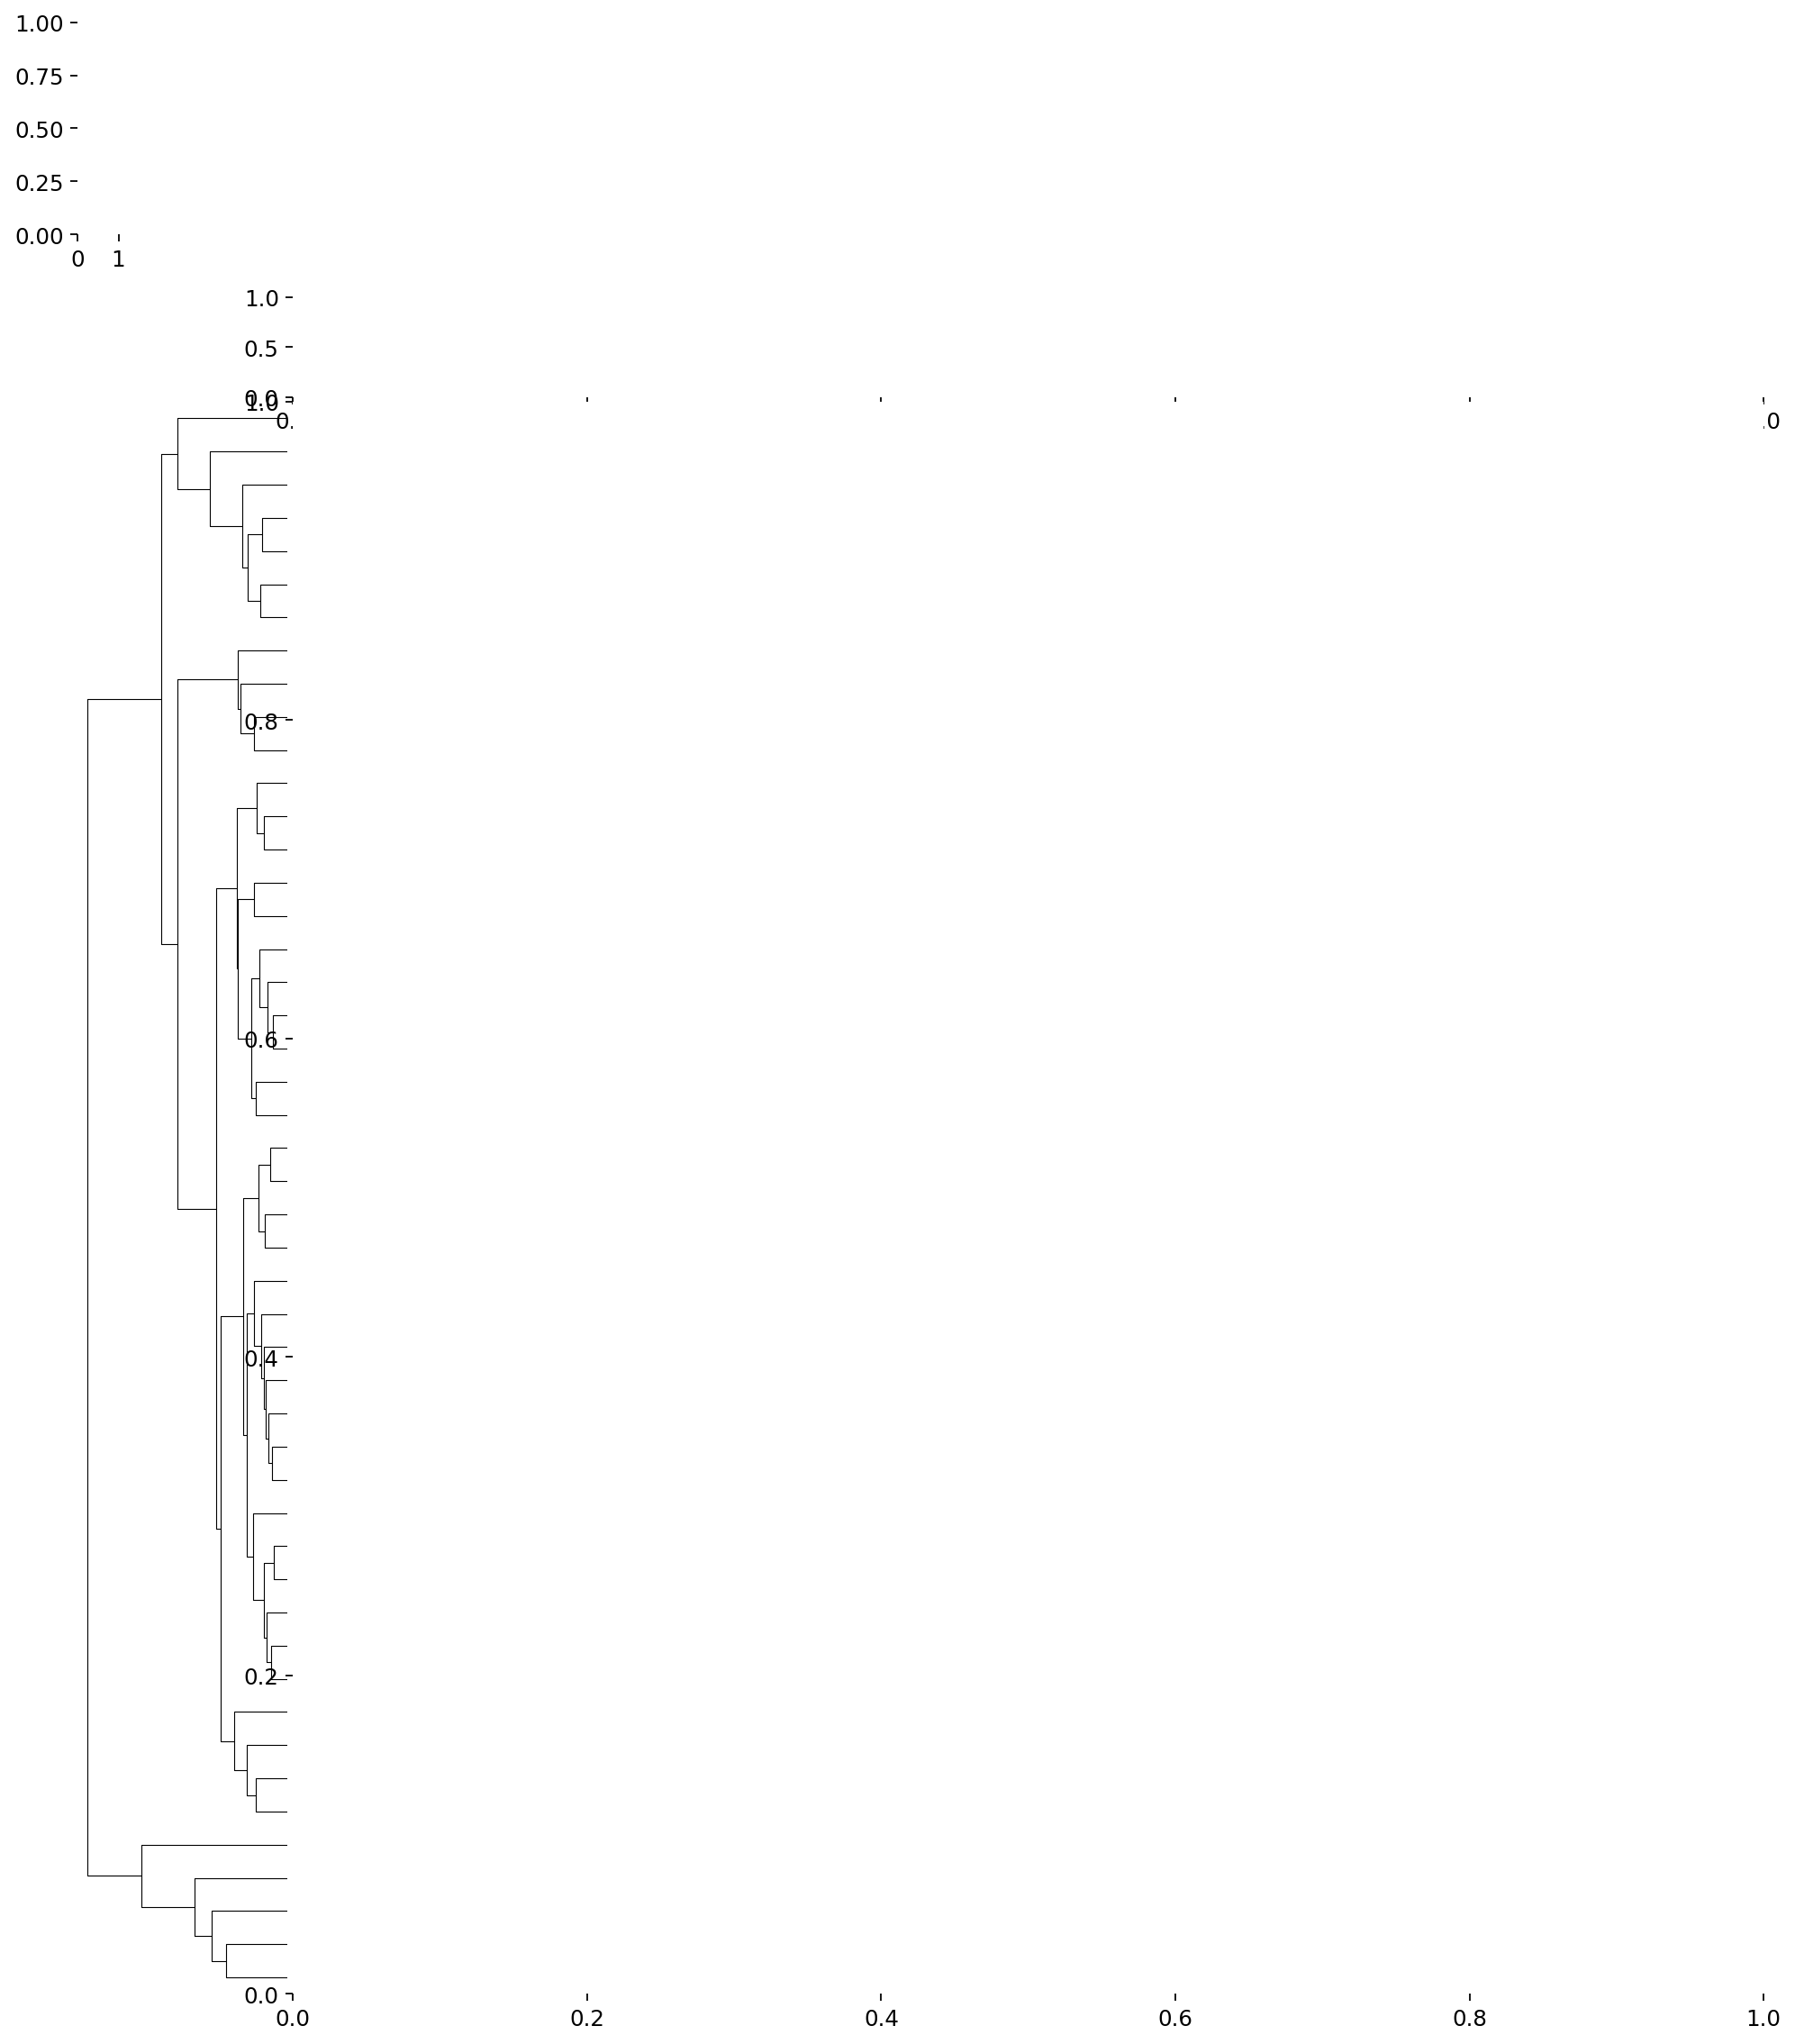

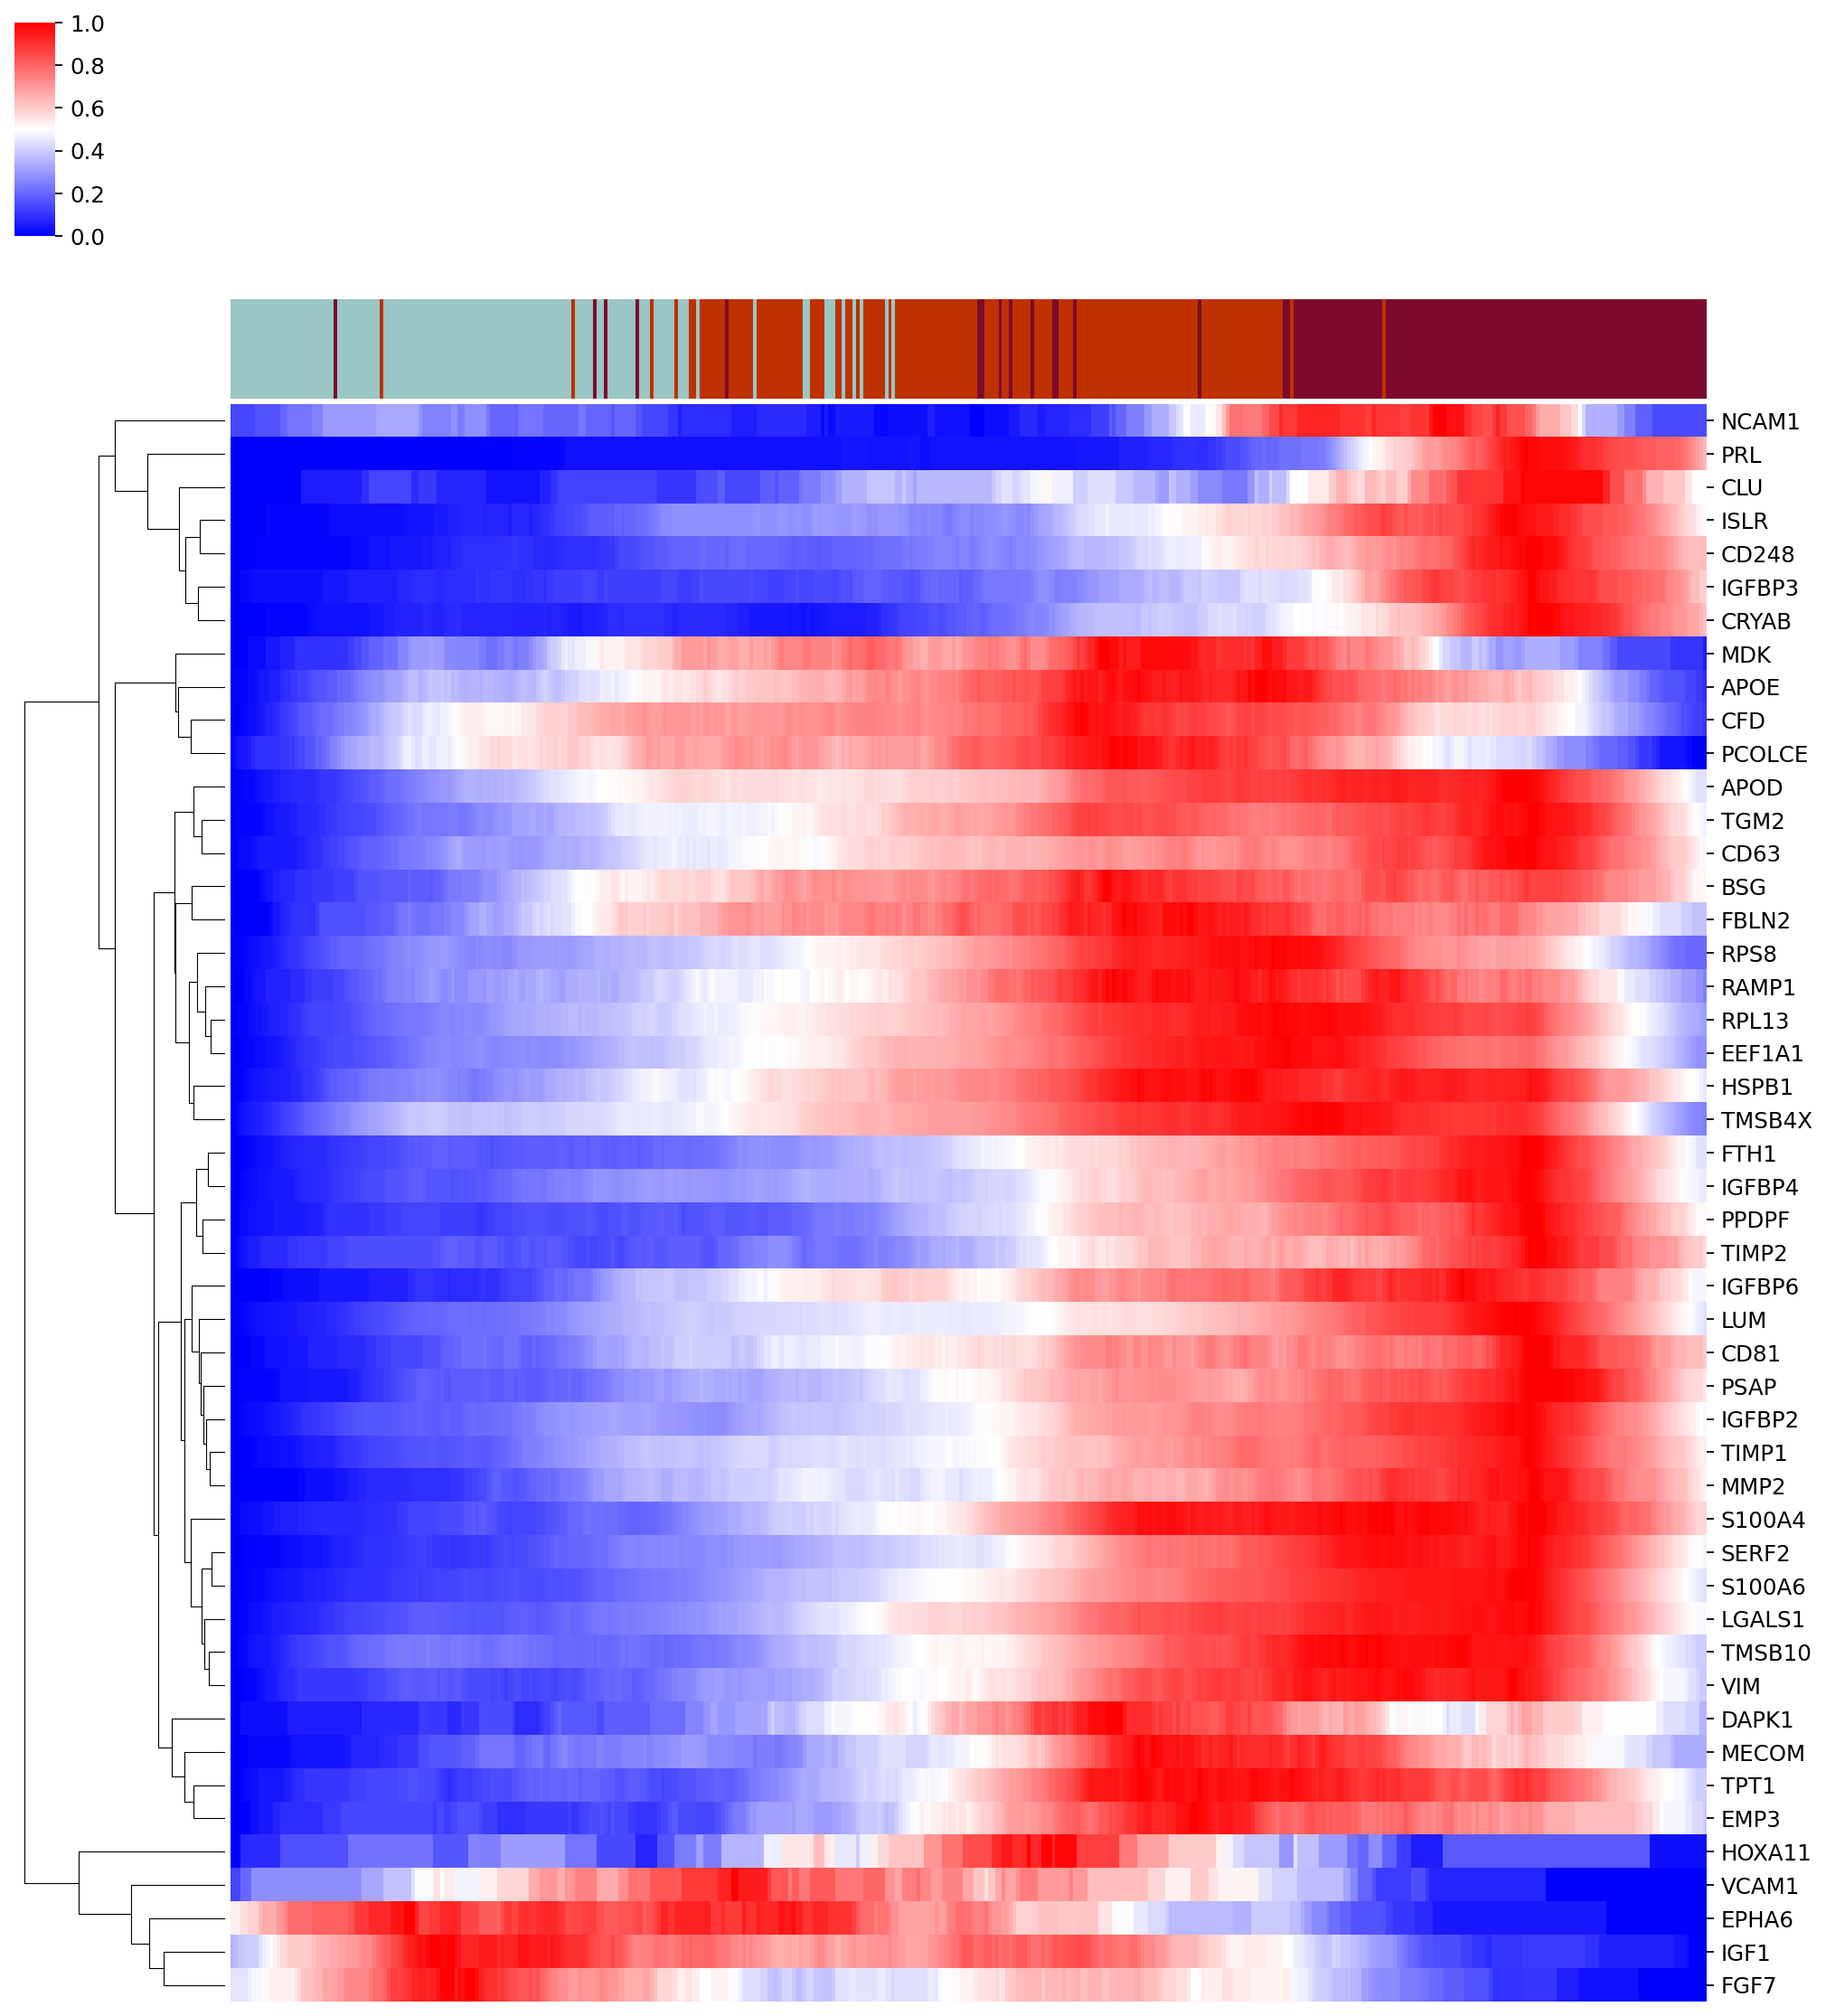

In [19]:
#DSC2 identity: 
scv.pl.heatmap(adata_dsc_new, var_names=dsc2_genes, sortby='S0_pseudotime', col_color='cell_type_semifinal_v2', 
               n_convolve=100, figsize=(15, 18), 
               color_map= 'bwr', row_cluster=True) #save= '_dDSC2_manuscript_v1.pdf' 

In [20]:
#Subset dFB_2 lineage: S0S3 & S3S4 specific branches. 
#fb_clusters= [('S0', 'S3'), ('S4', 'S3')]
fb_clusters= ['0', '3']

adata_fb= adata[adata.obs['branch_id_alias'].isin(fb_clusters)]
#adata_fb.obs['branch_id_alias'].value_counts()


#fb_include= ['dMSC', 'dFB_2', 'dSMC']
fb_include= ['4', '3', '5']

adata_fb_new = adata_fb[adata_fb.obs['cell_type_semifinal_v2'].isin(fb_include)]
adata_fb_new.obs['cell_type_semifinal_v2'].value_counts()

4    277
3    126
5     43
Name: cell_type_semifinal_v2, dtype: int64

In [21]:
adata_fb_new.uns['cell_type_semifinal_v2_colors']= ['#d76a03', '#9ac6c5', '#0b1d51']

Trying to set attribute `.uns` of view, copying.


In [22]:
#FB2 identity: 
fb_genes= ['SULF1', 'COL1A2', 'COL3A1', 'COL1A1', 'PDLIM3', 'EDIL3', 'TNC', 'ACTA2', 'SLIT2',
           'FN1', 'COL16A1', 'CTHRC1', 'COL8A1', 'ACTG2', 'PDLIM5', 'ITGA11', 'COL12A1', 'TAGLN', 
           'THBS2', 'THBS1', 'ENAH', 'CDH2', 'SORBS2', 'SORBS1', 'MYLK', 'NOX4', 'SEMA3D', 
           'FGF14', 'MATN2', 'SASH1', 'CNN1', 'TBX18', 'TPM2', 'RAPGEF5', 'CRIM1', 'SGCD', 
           'NPY1R', 'INHBA', 'CCL2', 'ELN', 'FRY', 'DMD', 'PCDH7', 'NRXN3', 'ADGRL3', 'PIEZO2']

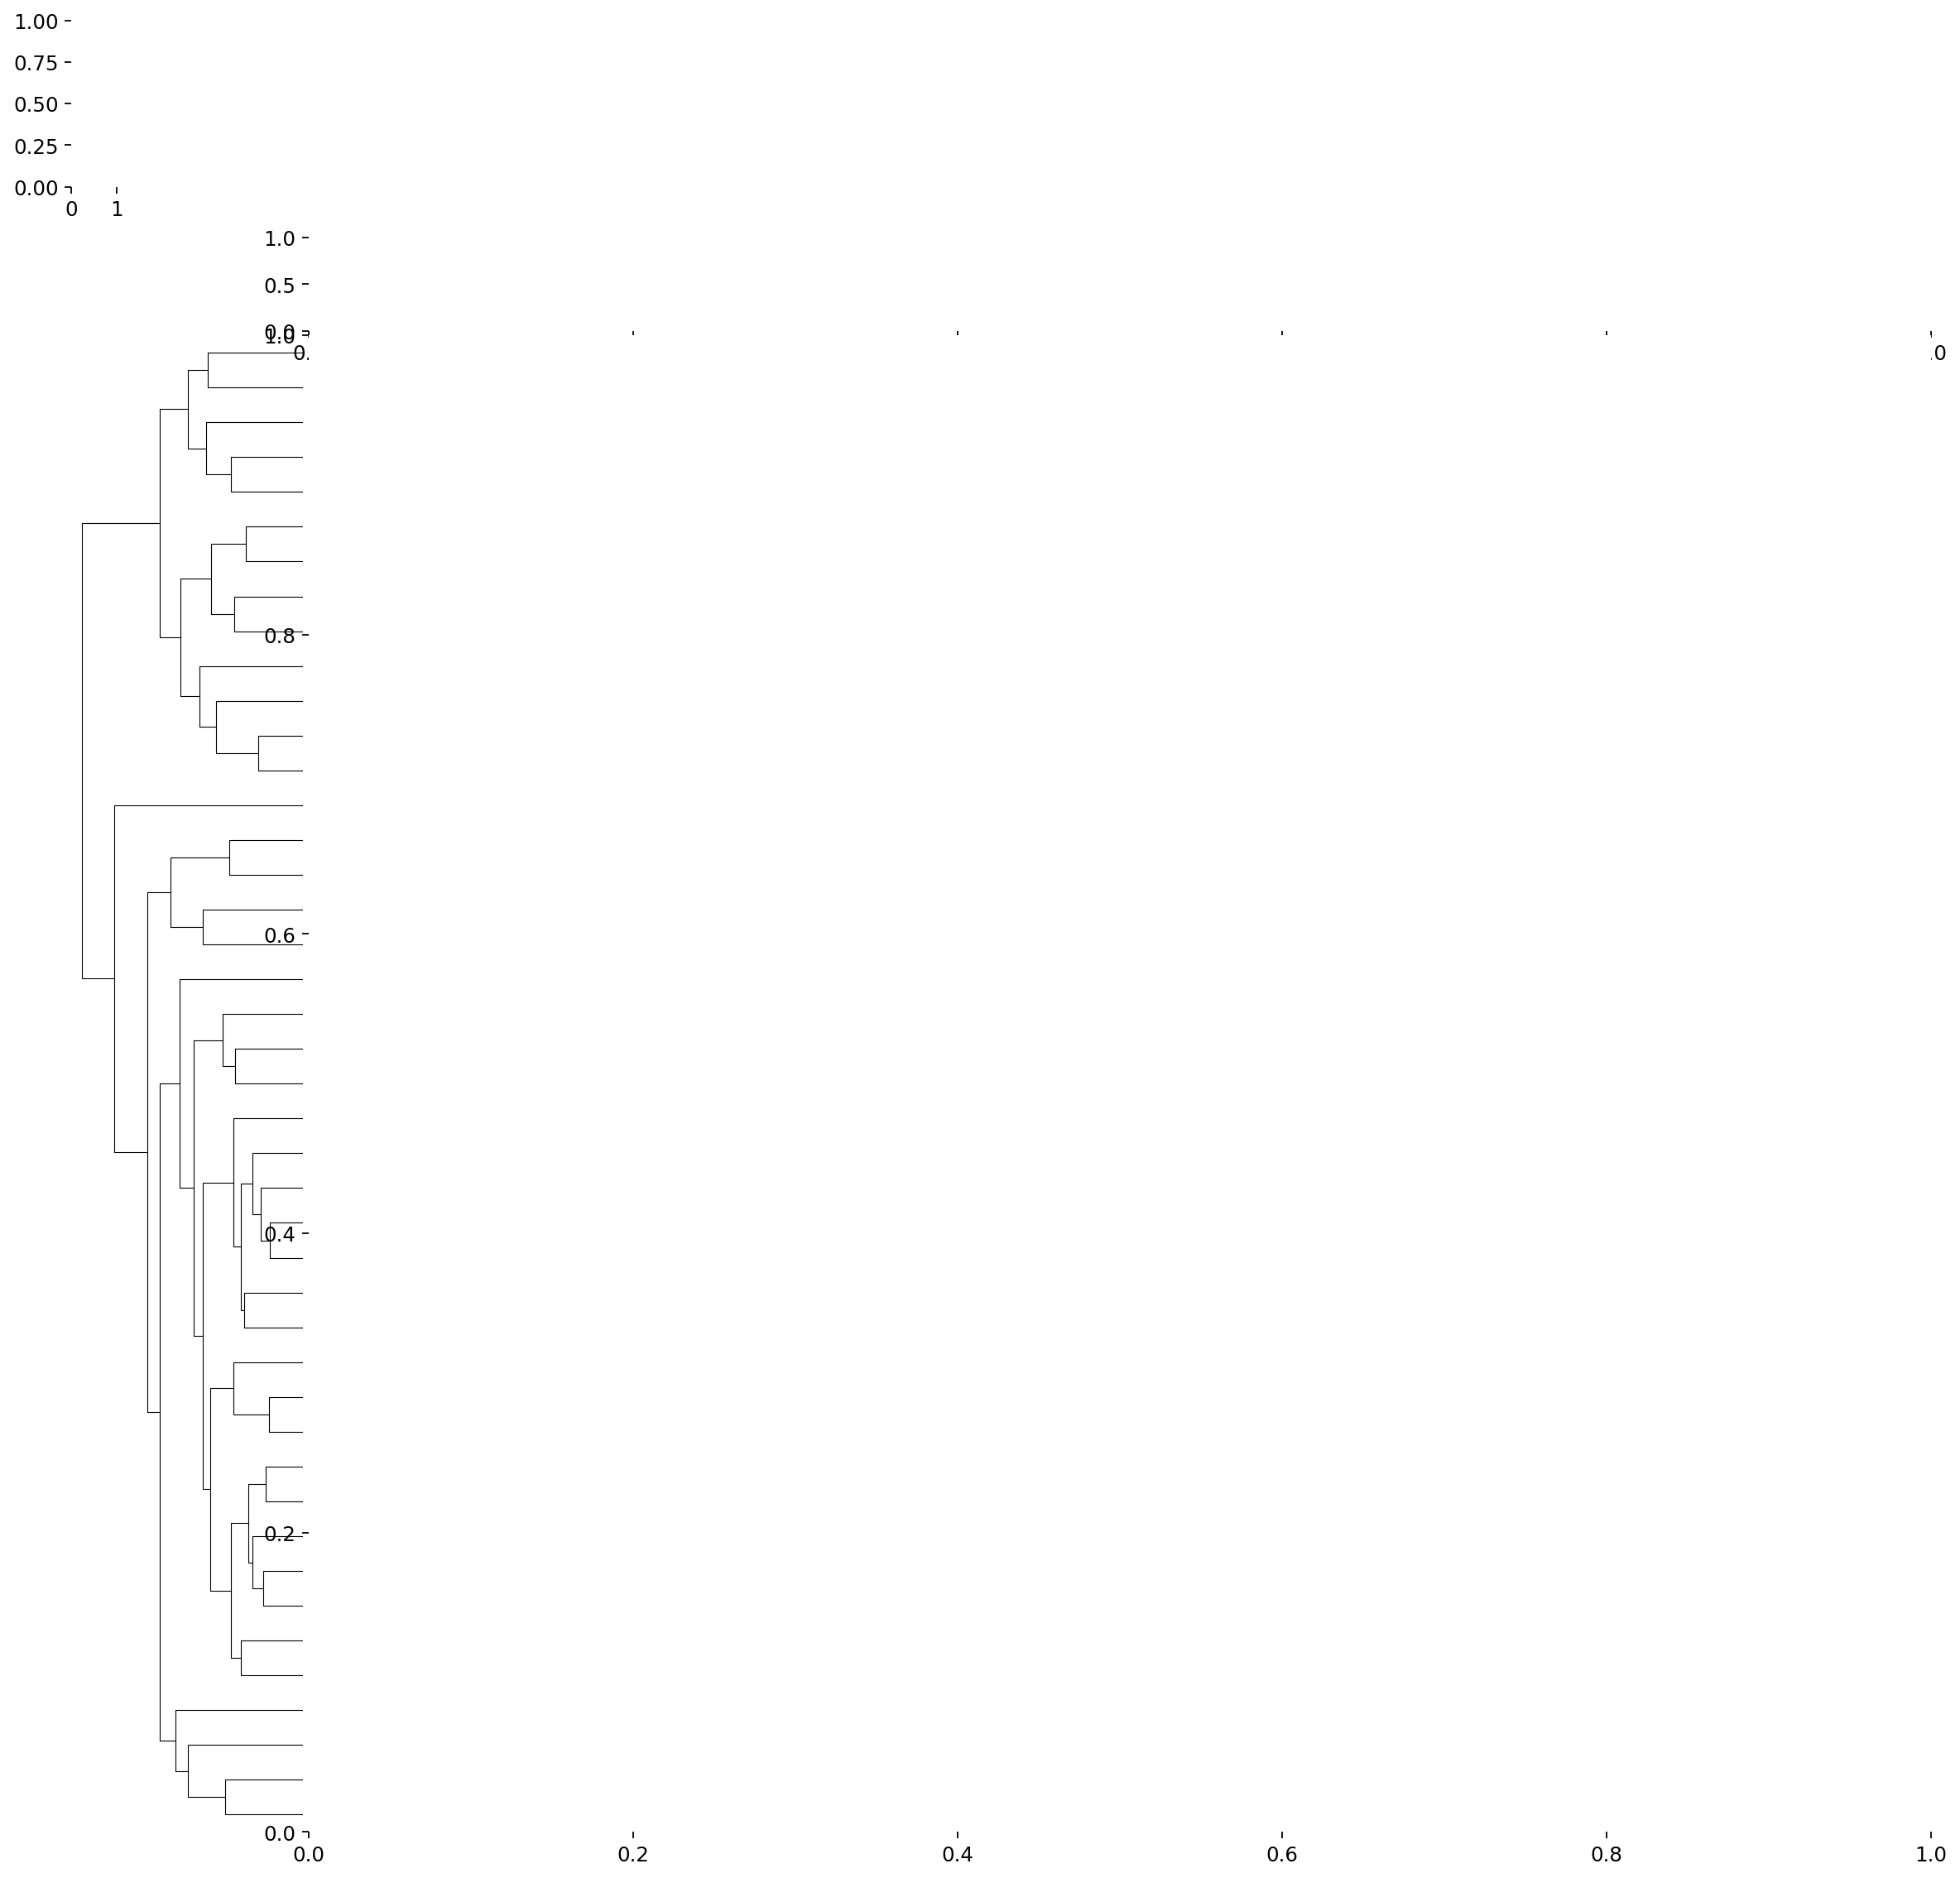

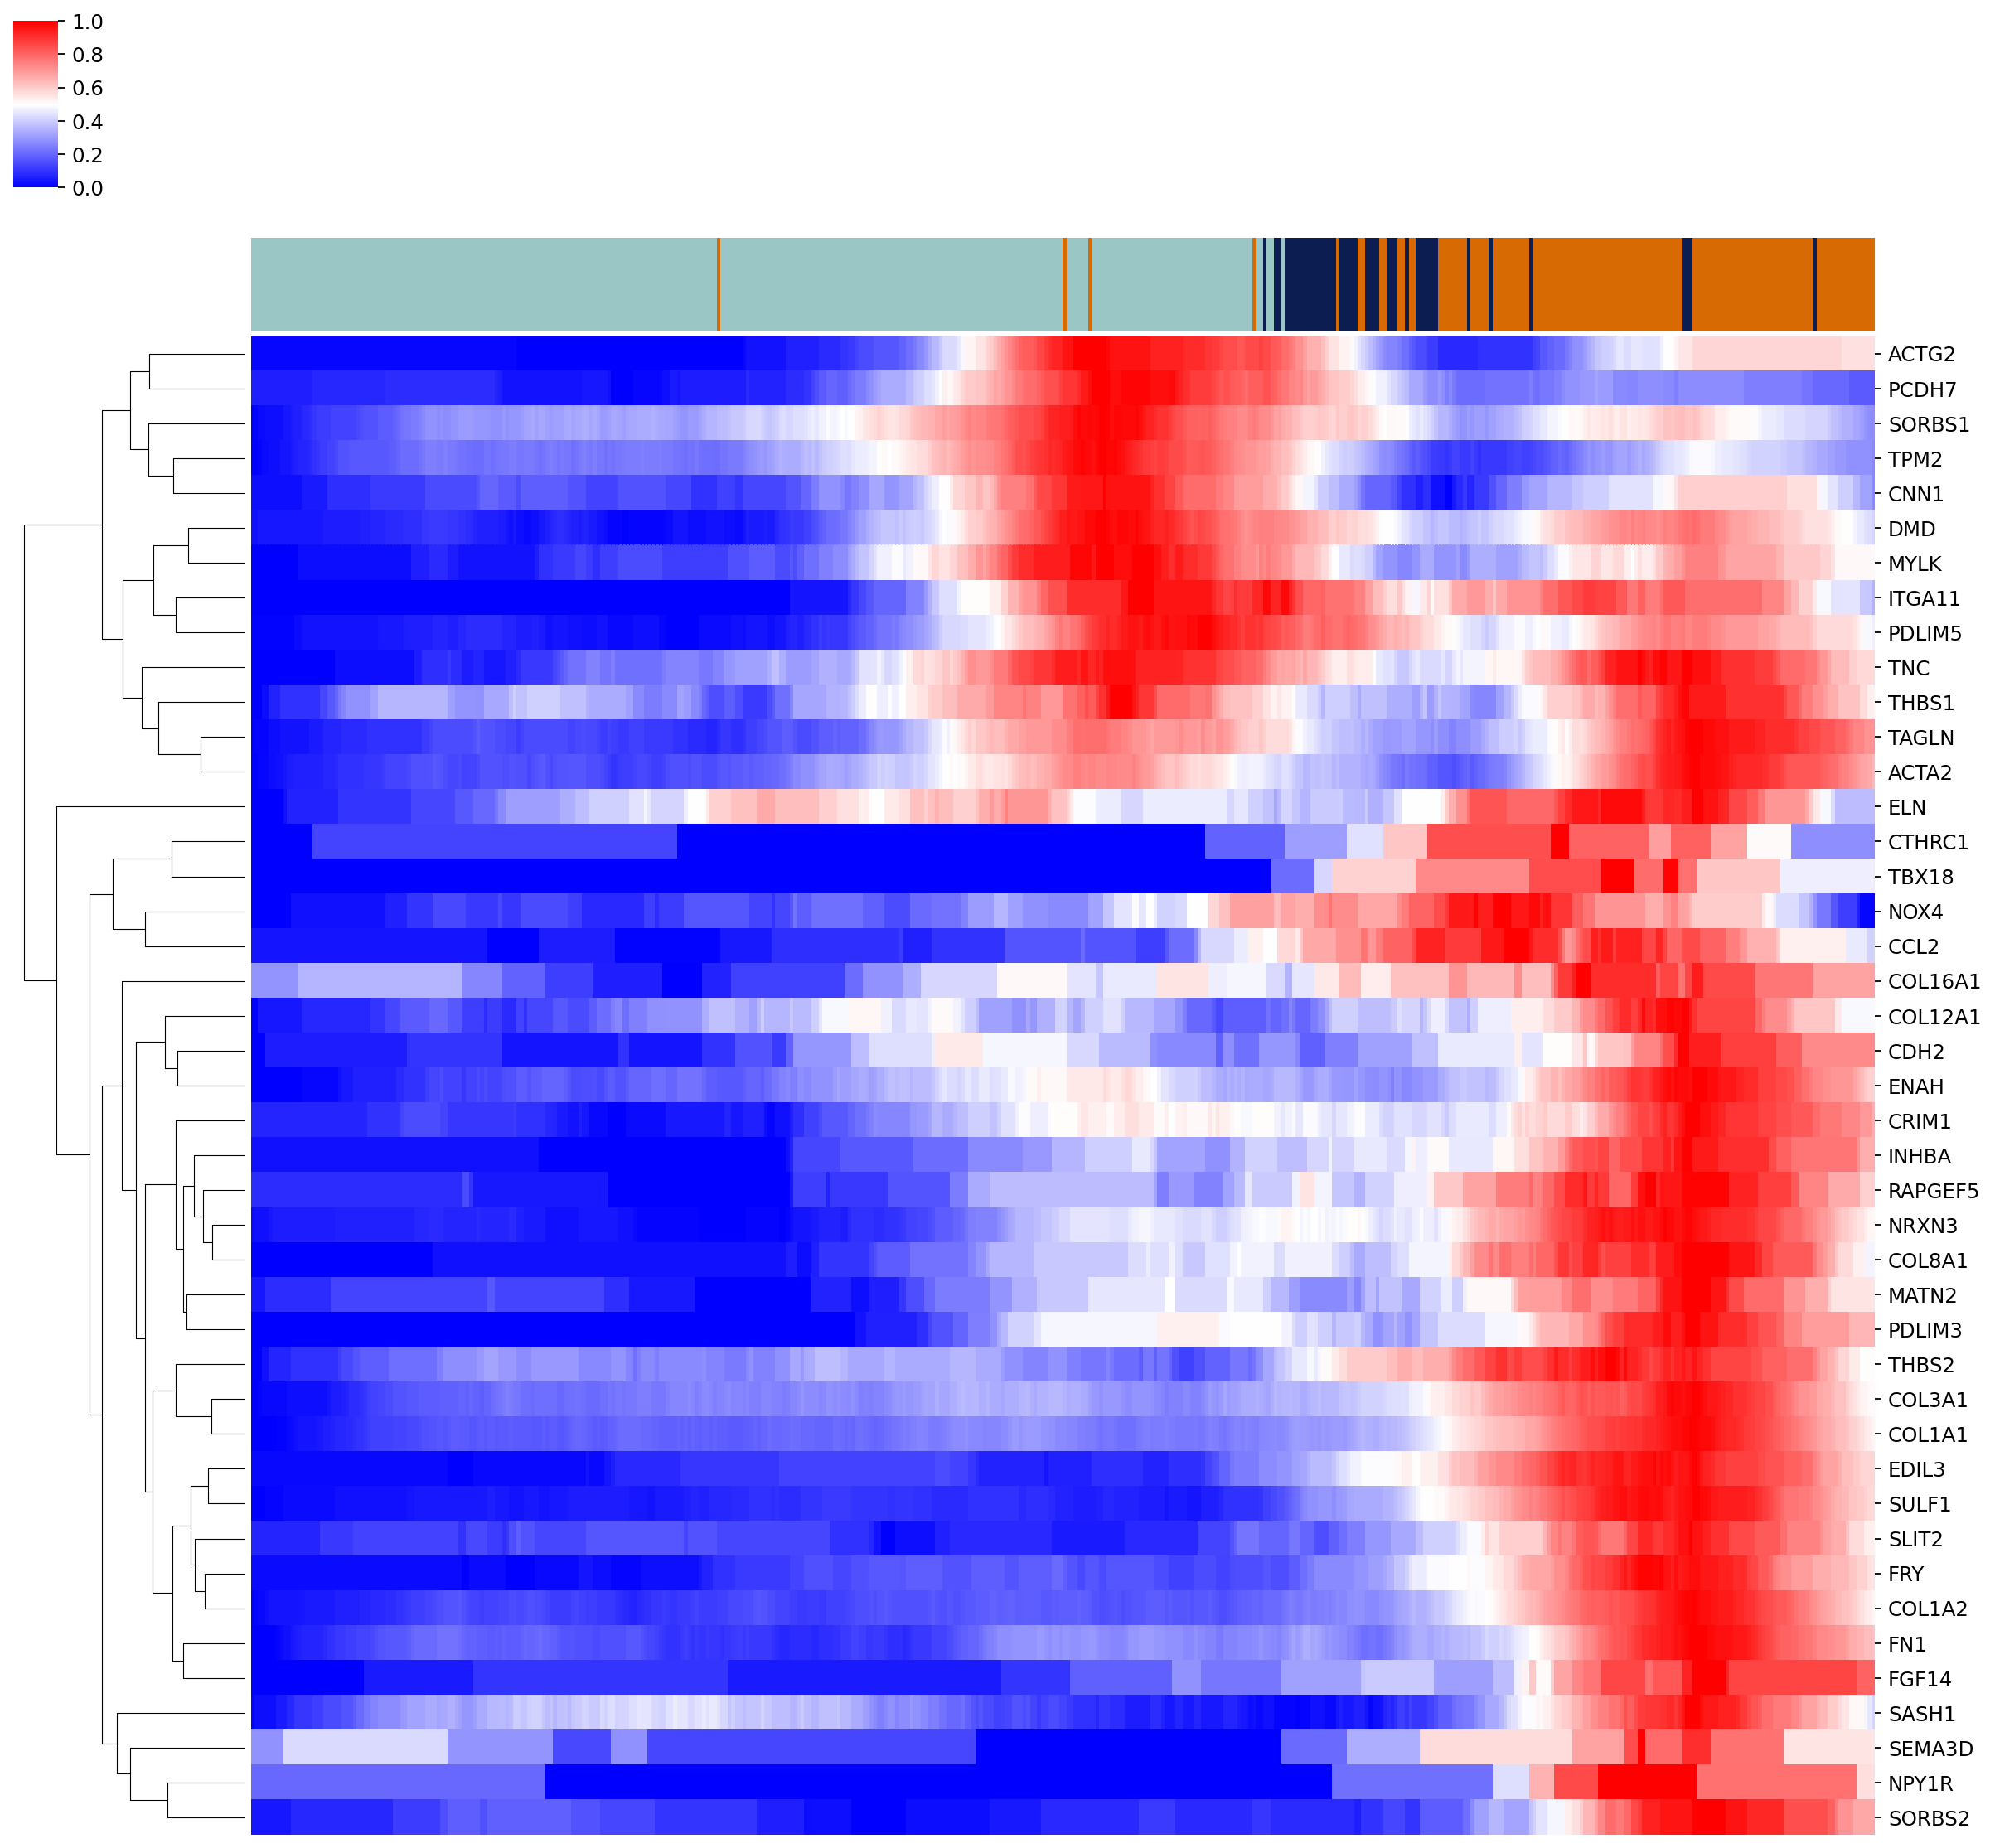

In [30]:
#FB2 identity: in extended figure 4f. 
fb_genes= ['SULF1', 'COL1A2', 'COL3A1', 'COL1A1', 'PDLIM3', 'EDIL3', 'TNC', 'ACTA2', 'SLIT2',
           'FN1', 'COL16A1', 'CTHRC1', 'COL8A1', 'ACTG2', 'PDLIM5', 'ITGA11', 'COL12A1', 'TAGLN', 
           'THBS2', 'THBS1', 'ENAH', 'CDH2', 'SORBS2', 'SORBS1', 'MYLK', 'NOX4', 'SEMA3D', 
           'FGF14', 'MATN2', 'SASH1', 'CNN1', 'TBX18', 'TPM2', 'RAPGEF5', 'CRIM1', 
           'NPY1R', 'INHBA', 'CCL2', 'ELN', 'FRY', 'DMD', 'PCDH7', 'NRXN3']

scv.pl.heatmap(adata_fb_new, var_names=fb_genes, sortby='S0_pseudotime', col_color='cell_type_semifinal_v2', n_convolve=100, 
               figsize=(18, 18), color_map= 'bwr', row_cluster=True)

In [25]:
#Subset SMC lineage: 
#smc_clusters= [('S0', 'S3'), ('S5', 'S3'), ('S7', 'S5'), ('S6', 'S5')]
smc_clusters= ['0', '4', '6', '5']

adata_smc= adata[adata.obs['branch_id_alias'].isin(smc_clusters)]
#adata_smc.obs['branch_id_alias'].value_counts()

#smc_include= ['dMSC', 'dFB_2', 'dSMC']
smc_include= ['4', '3', '5']

adata_smc_new = adata_smc[adata_smc.obs['cell_type_semifinal_v2'].isin(smc_include)]
adata_smc_new.obs['cell_type_semifinal_v2'].value_counts()

5    517
4    278
3     22
Name: cell_type_semifinal_v2, dtype: int64

In [26]:
#Include the corresponding color codes: 
adata_smc_new.uns['cell_type_semifinal_v2_colors']= ['#d76a03', '#9ac6c5', '#0b1d51']

Trying to set attribute `.uns` of view, copying.


In [27]:
#dSMC (smooth muscle cell) identity:  
smc_genes= ['GUCY1A2', 'RGS5', 'CPM', 'ADARB2', 'EGFLAM', 'LURAP1L', 'CDH6', 'GUCY1A1', 'ABCC9', 'SLC16A12', 
           'CCDC102B', 'MYO1B', 'ADGRB3', 'LURAP1L-AS1', 'COL18A1', 'MEF2C', 'TRPC6', 'NCKAP5', 'AC100803.3', 
            'PIP5K1B', 'MGP', 'IFITM3', 'FTL', 'ISG15', 'SLC38A11', 'ADIRF', 'STAB1', 'CLDN5', 
            'TPPP3', 'SLN', 'RRAD', 'BST2', 'LGI4', 'A2M', 'AQP1', 'PITPNC1']

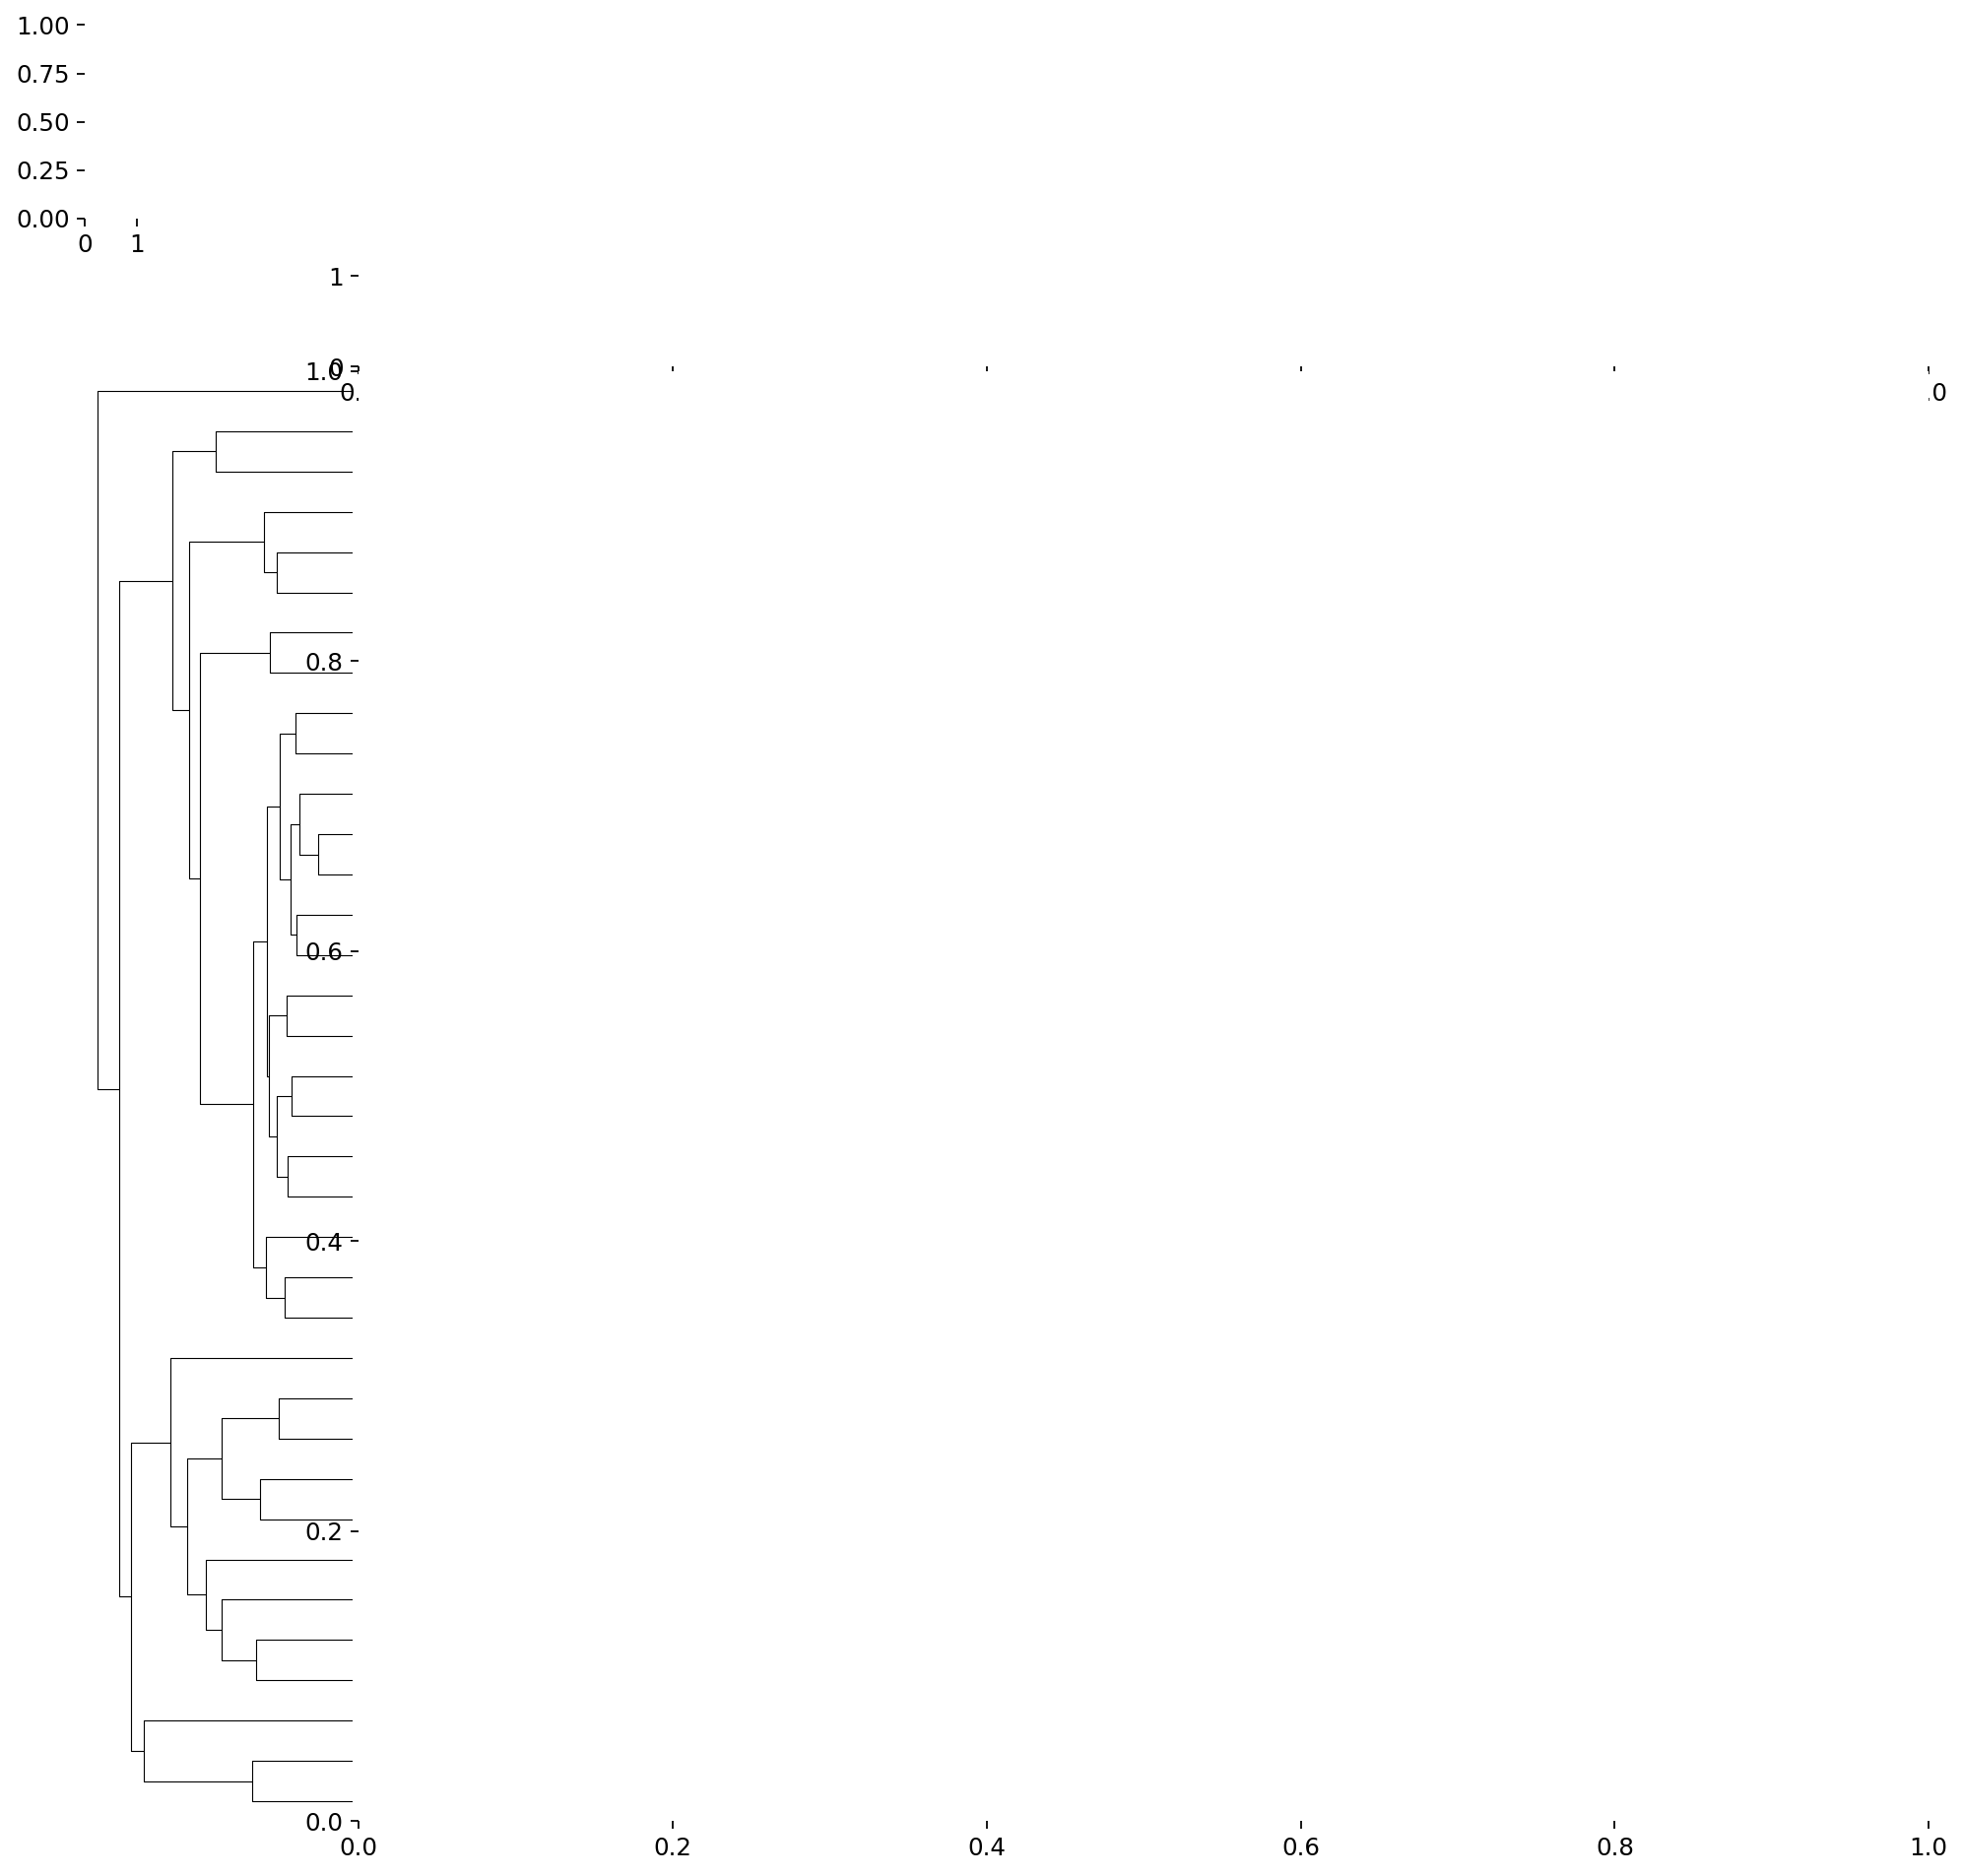

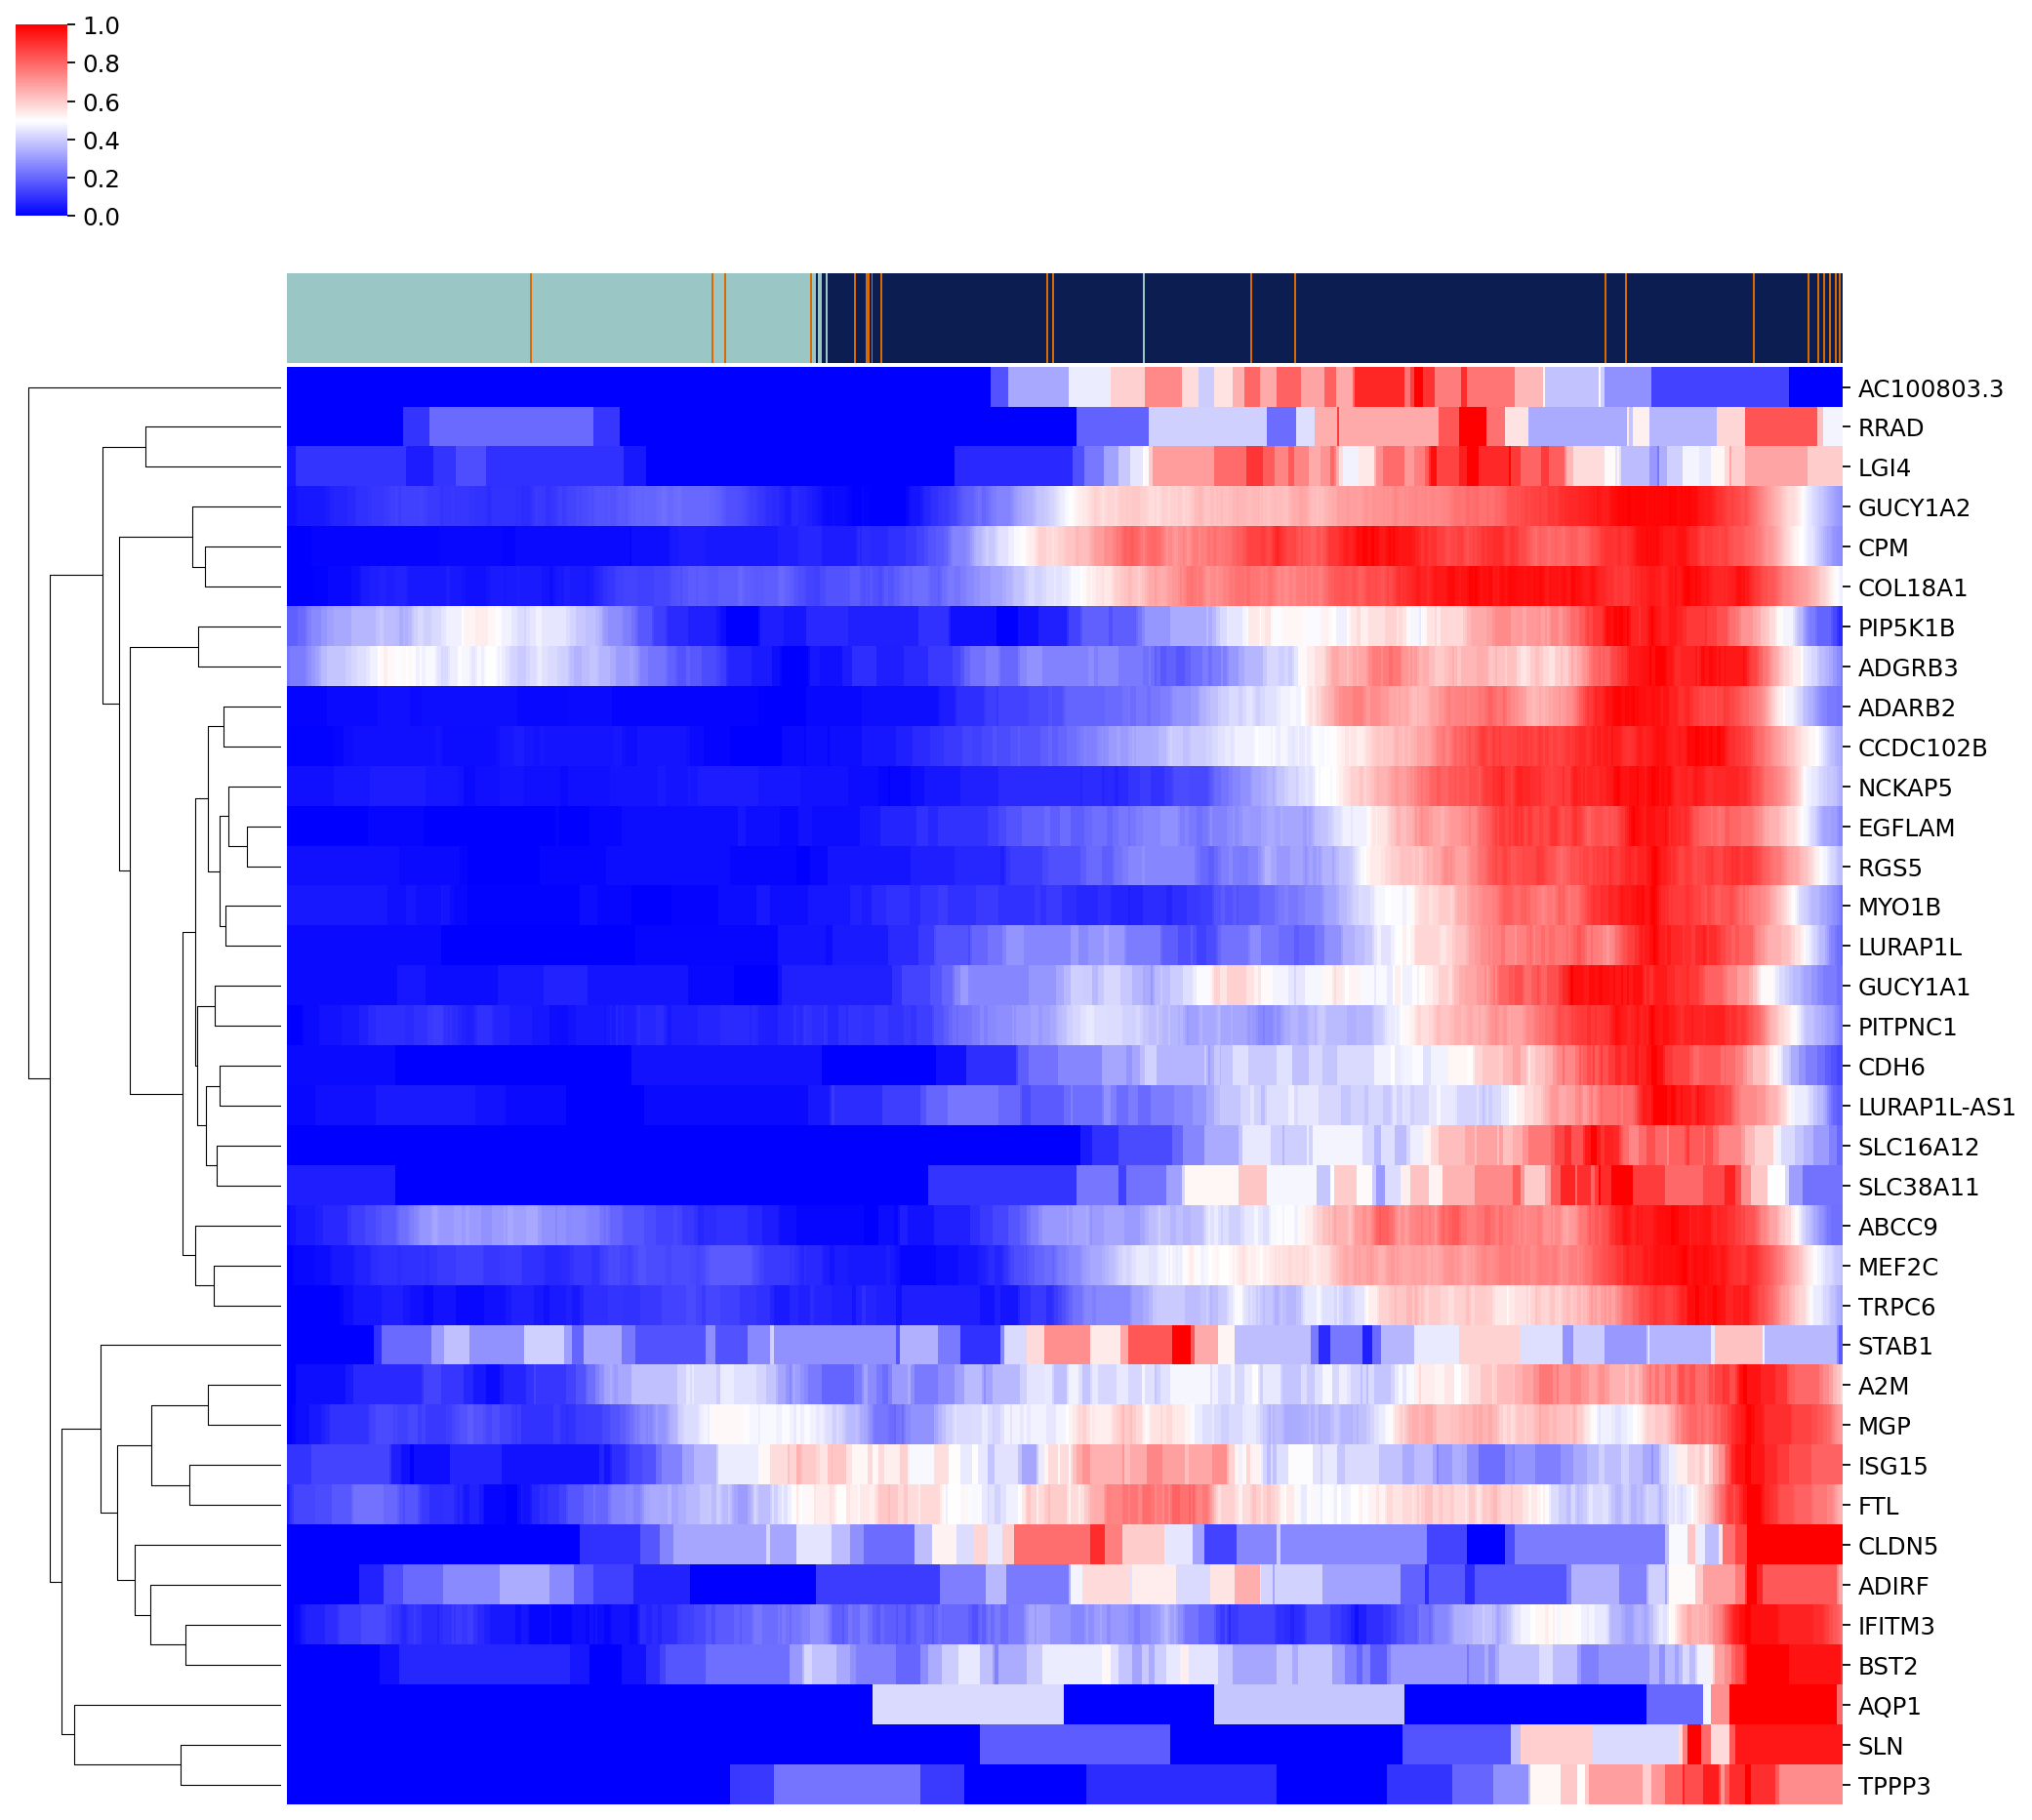

In [28]:
scv.pl.heatmap(adata_smc_new, var_names=smc_genes, sortby='S0_pseudotime', col_color='cell_type_semifinal_v2', 
               n_convolve=100, figsize=(15, 15), color_map= 'bwr', row_cluster=True) #save= '_SMC_manuscript_v1.pdf'

